In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Last Time...

In [2]:
galton = Table.read_table('http://inferentialthinking.com/notebooks/galton.csv')
galton

family,father,mother,midparentHeight,children,childNum,gender,childHeight
1,78.5,67,75.43,4,1,male,73.2
1,78.5,67,75.43,4,2,female,69.2
1,78.5,67,75.43,4,3,female,69
1,78.5,67,75.43,4,4,female,69
2,75.5,66.5,73.66,4,1,male,73.5
2,75.5,66.5,73.66,4,2,male,72.5
2,75.5,66.5,73.66,4,3,female,65.5
2,75.5,66.5,73.66,4,4,female,65.5
3,75,64,72.06,2,1,male,71
3,75,64,72.06,2,2,female,68


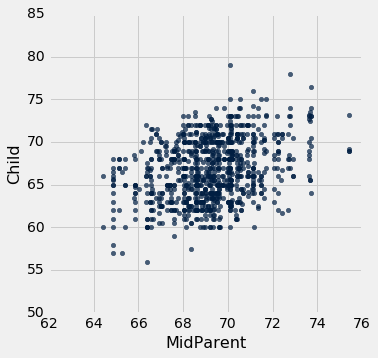

In [3]:
heights = galton.select(3, 7).relabeled(0, 'MidParent').relabeled(1, 'Child')
heights.scatter(0)

## Apply with two arguments

0-15 mins

Again, emphasize that you shouldn't worry too much about syntax during lecture. Make sure you know what tools you have available. Then, you can reference things when you need to.

In [4]:
first = galton.row(0)
first

Row(family='1', father=78.5, mother=67.0, midparentHeight=75.430000000000007, children=4, childNum=1, gender='male', childHeight=73.200000000000003)

In [5]:
len(first)

8

In [8]:
first.item(2)

67.0

In [9]:
first.item('mother')

67.0

In [10]:
m = first.item('mother')
f = first.item('father')
(1.08 * m + f) / 2

75.430000000000007

In [11]:
def mid_parent(m, f):
    return (1.08 * m + f) / 2

In [19]:
mid_parent(first.item('mother'), first.item('father'))

75.430000000000007

In [20]:
mid_parent(galton.row(1).item('mother'), galton.row(1).item('father'))

75.430000000000007

In [21]:
mid_parent(galton.row(4).item('mother'), galton.row(4).item('father'))

73.659999999999997

In [12]:
galton.take(np.arange(10)).apply(mid_parent, 'mother', 'father')

array([ 75.43,  75.43,  75.43,  75.43,  73.66,  73.66,  73.66,  73.66,
        72.06,  72.06])

In [16]:
def mid_parent_from_row(row):
    return (1.08 * row.item('mother') + row.item('father')) / 2

In [17]:
galton.take(np.arange(10)).apply(mid_parent_from_row)

array([ 75.43,  75.43,  75.43,  75.43,  73.66,  73.66,  73.66,  73.66,
        72.06,  72.06])

## Group

15-30 mins

In [22]:
all_cones = Table.read_table('http://inferentialthinking.com/notebooks/cones.csv')
cones = all_cones.drop('Color').exclude(5)
cones

Flavor,Price
strawberry,3.55
chocolate,4.75
chocolate,5.25
strawberry,5.25
chocolate,5.25


In [23]:
cones.group('Flavor')

Flavor,count
chocolate,3
strawberry,2


In [24]:
cones.group('Flavor', sum)

Flavor,Price sum
chocolate,15.25
strawberry,8.8


In [25]:
cones.where('Flavor', are.equal_to('chocolate')).column('Price')

array([ 4.75,  5.25,  5.25])

In [26]:
sum(cones.where('Flavor', are.equal_to('chocolate')).column('Price'))

15.25

In [27]:
sum(cones.where('Flavor', are.equal_to('strawberry')).column('Price'))

8.8000000000000007

In [28]:
cones.group('Flavor', max)

Flavor,Price max
chocolate,5.25
strawberry,5.25


In [30]:
cones.group('Flavor', np.mean)

Flavor,Price mean
chocolate,5.08333
strawberry,4.4


In [29]:
cones.group('Flavor', list)

Flavor,Price list
chocolate,"[4.75, 5.25, 5.25]"
strawberry,"[3.5499999999999998, 5.25]"


In [31]:
nba = Table.read_table('http://inferentialthinking.com/notebooks/nba_salaries.csv').relabeled(3, 'SALARY')
nba

PLAYER,POSITION,TEAM,SALARY
Paul Millsap,PF,Atlanta Hawks,18.6717
Al Horford,C,Atlanta Hawks,12
Tiago Splitter,C,Atlanta Hawks,9.75625
Jeff Teague,PG,Atlanta Hawks,8
Kyle Korver,SG,Atlanta Hawks,5.74648
Thabo Sefolosha,SF,Atlanta Hawks,4
Mike Scott,PF,Atlanta Hawks,3.33333
Kent Bazemore,SF,Atlanta Hawks,2
Dennis Schroder,PG,Atlanta Hawks,1.7634
Tim Hardaway Jr.,SG,Atlanta Hawks,1.30452


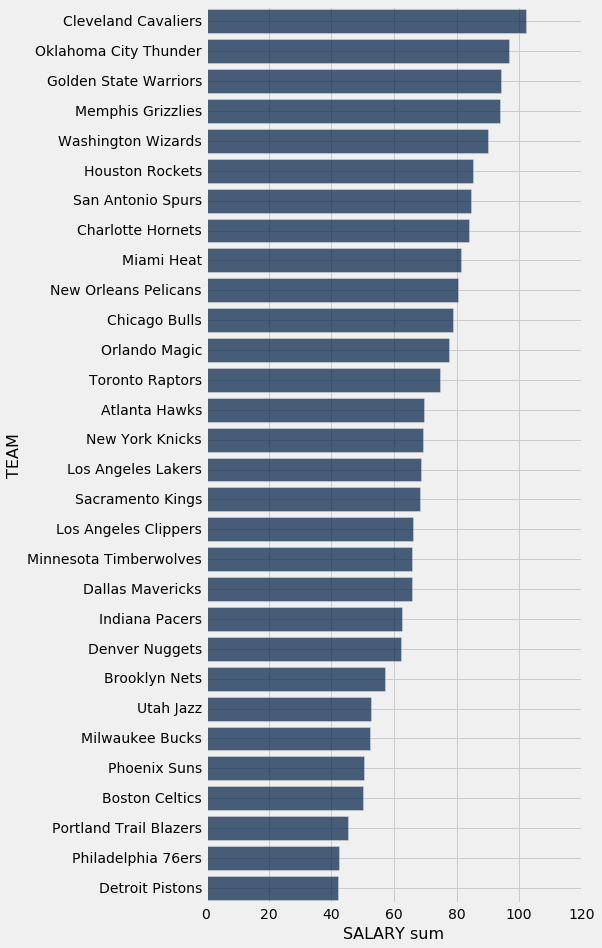

In [32]:
teams_and_money = nba.select('TEAM', 'SALARY')
teams_and_money.group('TEAM', sum).sort(1, descending=True).barh('TEAM')

In [33]:
nba.group('POSITION')

POSITION,count
C,69
PF,85
PG,85
SF,82
SG,96


In [34]:
positions_and_money = nba.select('POSITION', 'SALARY')
positions_and_money.group('POSITION', np.mean)

POSITION,SALARY mean
C,6.08291
PF,4.95134
PG,5.16549
SF,5.53267
SG,3.9882


In [35]:
nba.group('POSITION', np.mean)

POSITION,PLAYER mean,TEAM mean,SALARY mean
C,,,6.08291
PF,,,4.95134
PG,,,5.16549
SF,,,5.53267
SG,,,3.9882


## Group by multiple columns

30-40 mins

In [36]:
all_cones

Flavor,Color,Price
strawberry,pink,3.55
chocolate,light brown,4.75
chocolate,dark brown,5.25
strawberry,pink,5.25
chocolate,dark brown,5.25
bubblegum,pink,4.75


In [37]:
all_cones.group('Flavor')

Flavor,count
bubblegum,1
chocolate,3
strawberry,2


In [39]:
all_cones.group(make_array('Flavor', 'Color'))

Flavor,Color,count
bubblegum,pink,1
chocolate,dark brown,2
chocolate,light brown,1
strawberry,pink,2


In [40]:
all_cones.group(make_array('Flavor', 'Color'), sum)

Flavor,Color,Price sum
bubblegum,pink,4.75
chocolate,dark brown,10.5
chocolate,light brown,4.75
strawberry,pink,8.8


In [42]:
all_cones.group(['Flavor', 'Color'], sum)

Flavor,Color,Price sum
bubblegum,pink,4.75
chocolate,dark brown,10.5
chocolate,light brown,4.75
strawberry,pink,8.8


Discussion question: Use English statements instead of code since this is a hard one.

In [41]:
nba

PLAYER,POSITION,TEAM,SALARY
Paul Millsap,PF,Atlanta Hawks,18.6717
Al Horford,C,Atlanta Hawks,12
Tiago Splitter,C,Atlanta Hawks,9.75625
Jeff Teague,PG,Atlanta Hawks,8
Kyle Korver,SG,Atlanta Hawks,5.74648
Thabo Sefolosha,SF,Atlanta Hawks,4
Mike Scott,PF,Atlanta Hawks,3.33333
Kent Bazemore,SF,Atlanta Hawks,2
Dennis Schroder,PG,Atlanta Hawks,1.7634
Tim Hardaway Jr.,SG,Atlanta Hawks,1.30452


In [43]:
starters = nba.drop('PLAYER').group(['TEAM', 'POSITION'], max)
starters.drop('POSITION').group('TEAM', sum).sort(1, descending=True)

TEAM,SALARY max sum
Cleveland Cavaliers,82.3166
Oklahoma City Thunder,70.6988
Miami Heat,67.1273
San Antonio Spurs,67.034
Golden State Warriors,66.6431
Houston Rockets,61.2029
Chicago Bulls,57.8247
Los Angeles Lakers,55.8276
New York Knicks,55.0595
Memphis Grizzlies,53.5235


## Pivot

40-50 mins

In [46]:
all_cones.group(['Flavor', 'Color'])

Flavor,Color,count
bubblegum,pink,1
chocolate,dark brown,2
chocolate,light brown,1
strawberry,pink,2


In [44]:
all_cones.pivot('Flavor', 'Color')

Color,bubblegum,chocolate,strawberry
dark brown,0,2,0
light brown,0,1,0
pink,1,0,2


In [48]:
all_cones.group(['Flavor', 'Color'], sum)

Flavor,Color,Price sum
bubblegum,pink,4.75
chocolate,dark brown,10.5
chocolate,light brown,4.75
strawberry,pink,8.8


In [47]:
all_cones.pivot('Flavor', 'Color', values='Price', collect=sum)

Color,bubblegum,chocolate,strawberry
dark brown,0,10.5,0
light brown,0,4.75,0
pink,4.75,0,8.8


In [49]:
nba.pivot('POSITION', 'TEAM')

TEAM,C,PF,PG,SF,SG
Atlanta Hawks,3,2,2,2,5
Boston Celtics,3,2,4,2,4
Brooklyn Nets,1,3,2,2,5
Charlotte Hornets,3,3,4,2,6
Chicago Bulls,2,2,2,2,4
Cleveland Cavaliers,4,1,3,1,1
Dallas Mavericks,2,2,4,1,2
Denver Nuggets,4,2,2,4,2
Detroit Pistons,3,0,1,4,2
Golden State Warriors,3,3,2,4,2


In [51]:
nba.pivot('POSITION', 'TEAM', 'SALARY', max)

TEAM,C,PF,PG,SF,SG
Atlanta Hawks,12,18.6717,8,4,5.74648
Boston Celtics,2.61698,5,7.73034,6.79612,3.42551
Brooklyn Nets,1.3629,11.236,6.3,24.8949,3.42551
Charlotte Hornets,13.5,7,12,6.3314,13.1253
Chicago Bulls,13.4,5.54373,20.0931,2.38044,16.4075
Cleveland Cavaliers,14.2609,19.689,16.4075,22.9705,8.98876
Dallas Mavericks,5.2,15.4937,5.37897,15.3615,1.449
Denver Nuggets,5.6135,11.236,4.345,14,1.58448
Detroit Pistons,6.5,0,13.913,2.84196,6.27
Golden State Warriors,13.8,14.2609,11.3708,11.7105,15.501


## Example

In [54]:
full_table = Table.read_table('http://inferentialthinking.com/notebooks/educ_inc.csv')
ca_2014 = full_table.where('Year', are.equal_to('1/1/14 0:00')).where('Age', are.not_equal_to('00 to 17')).drop('Year')
ca_2014

Age,Gender,Educational Attainment,Personal Income,Population Count
18 to 64,Female,No high school diploma,"H: 75,000 and over",2058
65 to 80+,Male,No high school diploma,"H: 75,000 and over",2153
65 to 80+,Female,No high school diploma,"G: 50,000 to 74,999",4666
65 to 80+,Female,High school or equivalent,"H: 75,000 and over",7122
65 to 80+,Female,No high school diploma,"F: 35,000 to 49,999",7261
65 to 80+,Male,No high school diploma,"G: 50,000 to 74,999",8569
18 to 64,Female,No high school diploma,"G: 50,000 to 74,999",14635
65 to 80+,Male,No high school diploma,"F: 35,000 to 49,999",15212
65 to 80+,Male,"College, less than 4-yr degree","B: 5,000 to 9,999",15423
65 to 80+,Female,Bachelor's degree or higher,"A: 0 to 4,999",15459


In [55]:
totals = ca_2014.pivot('Educational Attainment', 3, values=4, collect=sum)
totals

Personal Income,Bachelor's degree or higher,"College, less than 4-yr degree",High school or equivalent,No high school diploma
"A: 0 to 4,999",575491,985011,1161873,1204529
"B: 5,000 to 9,999",326020,810641,626499,597039
"C: 10,000 to 14,999",452449,798596,692661,664607
"D: 15,000 to 24,999",773684,1345257,1252377,875498
"E: 25,000 to 34,999",693884,1091642,929218,464564
"F: 35,000 to 49,999",1122791,1112421,782804,260579
"G: 50,000 to 74,999",1594681,883826,525517,132516
"H: 75,000 and over",2986698,748103,323192,58945


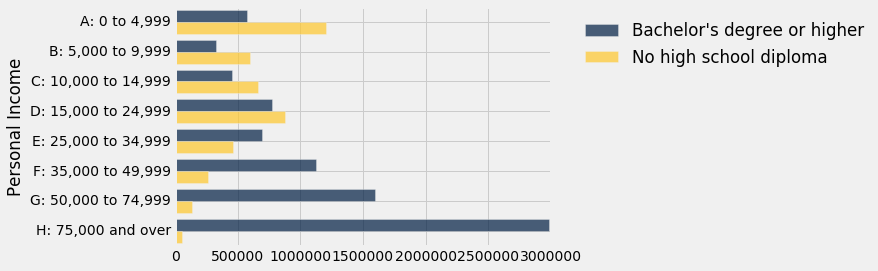

In [56]:
totals.select(0, 1, 4).barh(0)

## Take Home Question

In [ ]:
index

In [52]:
# Solution to take-home question:
# How do you make a table of the highest paid players for each team & position
indexed = nba.with_column('INDEX', np.arange(nba.num_rows))
def highest_paid(indices):
    return indexed.take(indices).sort('SALARY', descending=True).column('PLAYER').item(0)
indexed.pivot('POSITION', 'TEAM', 'INDEX', highest_paid)

TEAM,C,PF,PG,SF,SG
Atlanta Hawks,Al Horford,Paul Millsap,Jeff Teague,Thabo Sefolosha,Kyle Korver
Boston Celtics,Tyler Zeller,Jonas Jerebko,Avery Bradley,Jae Crowder,Evan Turner
Brooklyn Nets,Andrea Bargnani,Thaddeus Young,Jarrett Jack,Joe Johnson,Bojan Bogdanovic
Charlotte Hornets,Al Jefferson,Marvin Williams,Kemba Walker,Michael Kidd-Gilchrist,Nicolas Batum
Chicago Bulls,Joakim Noah,Nikola Mirotic,Derrick Rose,Doug McDermott,Jimmy Butler
Cleveland Cavaliers,Tristan Thompson,Kevin Love,Kyrie Irving,LeBron James,Iman Shumpert
Dallas Mavericks,Zaza Pachulia,David Lee,Deron Williams,Chandler Parsons,Justin Anderson
Denver Nuggets,JJ Hickson,Kenneth Faried,Jameer Nelson,Danilo Gallinari,Gary Harris
Detroit Pistons,Aron Baynes,,Reggie Jackson,Stanley Johnson,Jodie Meeks
Golden State Warriors,Andrew Bogut,Draymond Green,Stephen Curry,Andre Iguodala,Klay Thompson


In [53]:
# The solution above does not assume that the nba table is already sorted.
# Since nba is sorted in decreasing order of salary by team, the following works too
def first(players):
    return players.item(0)
indexed.pivot('POSITION', 'TEAM', 'PLAYER', first)

TEAM,C,PF,PG,SF,SG
Atlanta Hawks,Al Horford,Paul Millsap,Jeff Teague,Thabo Sefolosha,Kyle Korver
Boston Celtics,Tyler Zeller,Jonas Jerebko,Avery Bradley,Jae Crowder,Evan Turner
Brooklyn Nets,Andrea Bargnani,Thaddeus Young,Jarrett Jack,Joe Johnson,Bojan Bogdanovic
Charlotte Hornets,Al Jefferson,Marvin Williams,Kemba Walker,Michael Kidd-Gilchrist,Nicolas Batum
Chicago Bulls,Joakim Noah,Nikola Mirotic,Derrick Rose,Doug McDermott,Jimmy Butler
Cleveland Cavaliers,Tristan Thompson,Kevin Love,Kyrie Irving,LeBron James,Iman Shumpert
Dallas Mavericks,Zaza Pachulia,David Lee,Deron Williams,Chandler Parsons,Justin Anderson
Denver Nuggets,JJ Hickson,Kenneth Faried,Jameer Nelson,Danilo Gallinari,Gary Harris
Detroit Pistons,Aron Baynes,,Reggie Jackson,Stanley Johnson,Jodie Meeks
Golden State Warriors,Andrew Bogut,Draymond Green,Stephen Curry,Andre Iguodala,Klay Thompson
